In [1]:
from QuantLib import *
import matplotlib.pyplot as plt
import numpy as np
#from scipy.integrate import simps, cumtrapz, romb
% matplotlib inline
import math


UsageError: Line magic function `%` not found.


In [33]:
# option parameters
strike_price = 110.0
payoff = PlainVanillaPayoff(Option.Call, strike_price)
# option data
maturity_date = Date(15, 1, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols for a year
dividend_rate = 0.0163
option_type = Option.Call
risk_free_rate = 0.001
day_count = Actual365Fixed()
calendar = UnitedStates()
calculation_date = Date(8, 5, 2015)
Settings.instance().evaluationDate = calculation_date

In [34]:
# construct the European Option
payoff = PlainVanillaPayoff(option_type, strike_price)
exercise = EuropeanExercise(maturity_date)
european_option = VanillaOption(payoff, exercise)

In [35]:
# construct the Heston process
v0 = volatility*volatility # spot variance
kappa = 0.1
theta = v0
sigma = 0.1
rho = -0.75
spot_handle = QuoteHandle(SimpleQuote(spot_price))
flat_ts = YieldTermStructureHandle(FlatForward(calculation_date, risk_free_rate, day_count))
dividend_yield = YieldTermStructureHandle(FlatForward(calculation_date, dividend_rate, day_count))
heston_process = HestonProcess(flat_ts, dividend_yield,spot_handle, v0, kappa,theta, sigma, rho)


In [36]:
engine = AnalyticHestonEngine(HestonModel(heston_process),0.01, 1000)
european_option.setPricingEngine(engine)
h_price = european_option.NPV()
print("The Heston model price is",h_price)

The Heston model price is 6.533855481449102


In [37]:
flat_vol_ts = BlackVolTermStructureHandle(BlackConstantVol(calculation_date, calendar,volatility, day_count))
bsm_process = BlackScholesMertonProcess(spot_handle, dividend_yield,flat_ts, flat_vol_ts)
european_option.setPricingEngine(AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print("The Black-Scholes-Merton model price is ", bs_price)


The Black-Scholes-Merton model price is  6.749271812460607


## Binomial pricing

In [11]:
def binomial_price(option, bsm_process, steps):
    binomial_engine = BinomialVanillaEngine(bsm_process, "crr", steps)
    option.setPricingEngine(binomial_engine)
    return option.NPV()
steps = range(2, 200, 1)
prices = [binomial_price(european_option, bsm_process, step) for step in steps]

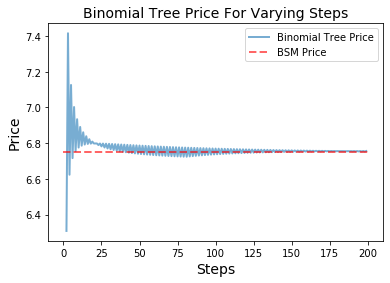

In [12]:
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,200],[bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps", size=14)
plt.ylabel("Price", size=14)
plt.title("Binomial Tree Price For Varying Steps", size=14)
plt.legend()